The specifications of the classes you intend to write (at least 5!)

Briefly describe the purpose of each class

List expected methods/functions that belong to each class

List inputs and outputs for each method/function

How the user will interact with the program / objects

Include the features that you're going to include in the project and why you think it should be of sufficient 
complexity to meet the project goals.

Coding is iterative. Your final code may not match the proposal exactly.

Please make this document a pdf before uploading to github!

In [ ]:
artist # class for artists which contain release and track objects
    __init__(self,name,tracks,releases)
    name # str of artist name
    tracks # list of track objects
    releases # list of release objects

track # class for tracks, holds all information for track as attributes
    __init__(self,name,artist,release,genre,length,image_url)
    name # str of track name
    artist # str of artist
    release # str of release
    genre # str of genre
    length # int of runtime in seconds
    image(image_url) # method to display image, output is image plot
    
playlist # class for playlists which will contain track objects
    __init__(self,name,user,description,tracks,image_url)
    name # str of playlist name
    creator # str of user who created the playlist
    length # int of runtime in seconds
    description # str of playlist description
    tracks # list of track objects
    image(image_url) # method to display image, output is image plot
    port_to(filename or link or new playlist) # method to export a playlist to csv or spotify, no output to terminal
    port_from(filename or link) # method to import a playlist from csv or spotify, outputs playlist
    get_discogs_info() # method to import discogs information for tracks, outputs playlist
    sift(filter_crit) # method to filter through playlists on various track attributes, outputs playlist
    
release # class for releases which will contain track objects
    init(self,name,artist,genre,released,catalog,country,tracks,formats,image_url)
    name # str of release name
    artist # str of artist name
    genre # str of genre
    length # int of runtime in seconds
    released # str of release year
    catalog # str of catalog number
    country # str of country of origin
    tracks # list of track objects
    formats # list of str of release formats
    image(image_url) # method to display image, output is image plot
    
user # class for user, used to import data from spotify/discogs
    init(self,name,spotify_acc=True,discogs_acc=True)
    name #str of user name
    spotify_acc # bool if user has spotify account
    discogs_acc # bool if user has discogs account
    s # spotify api client
    d # discogs api client


Possible Usage

A user will create an instance of the user class (e.g. e=user('erick')).
__init__ will connect to the spotify and discogs apis to allow for importing into playlists.
The user will then create a playlist object which can be filled at creation manually.
The user can also import a playlist (port_from()) from a csv file or a spotify link which will fill the playlist after creation.
The user can call get_discogs_info() to append discogs information (where applicable) to playlist.
The user can port_from() to add more tracks to continue appending to the playlist.
The user can additionally sift() to create filtered versions of playlists.
The user can call port_to() on the playlist to export into csv or spotify (discogs info will not pass into spotify).

CSV output of spotify playlists with additional track information is extremely useful in commnity radio broadcasting. Spinitron (playlist-management for non-commercial community radio) accepts csv files for bulk livestream playlists. Ideally the track information is sent to Spinitron directly but they don't have an API and submitting using some unofficial method seems prone to security issues or potentially against ToS. Creating themed shows is also very valuable for radio programmers (e.g. 60's italian pop under 200,000 streams, tracks that are only on tapes, south american labels with new releases this year, etc.) That large scale filtering potential is very powerful.


In [135]:
import discogs_client
import spotipy
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
import requests
from spotipy.oauth2 import SpotifyOAuth

In [196]:
d = discogs_client.Client('erickfm', user_token="anZOIdKhlgGPxMenrheVbquwaRVWfawBsyNcOMjo")

In [455]:
results = d.search('bamboo grove CZ-5000 Sounds & Sequences satoshi & makoto', type='release')

In [456]:
results[0].labels[0].name

'Safe Trip'

In [385]:
r = requests.get('https://api.discogs.com/releases/' + str(results[0].id)).json()

In [386]:
r['labels'][0]['catno']

'ST 006'

In [199]:
url=results[0].images[0]['uri']

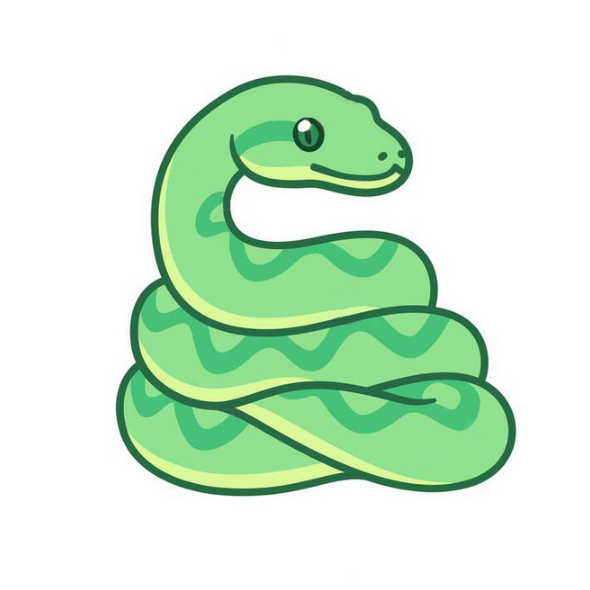

In [896]:
ax = plt.axes([0,0,2,2])
plt.axis("off")
im = Image.open(requests.get(url, stream=True).raw)
display=imshow(im)

In [141]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

scope = "user-read-playback-state user-read-currently-playing user-library-read user-top-read user-read-recently-played playlist-read-private playlist-read-collaborative"
redirect_uri= 'https://example.com/callback/'

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id='d3c4d26f750f45daa2434a1585745291',
                                               client_secret='8912e43e7ebe4b1a84097e3997eb50ec',
                                               scope=scope,
                                               redirect_uri=redirect_uri))

results = sp.current_user_saved_tracks()
for idx, item in enumerate(results['items']):
    track = item['track']
    print(idx, track['artists'][0]['name'], " – ", track['name'])

In [142]:
sp.current_user_saved_tracks()['items']

[]

In [143]:
for i in sp.current_user_top_tracks(10)['items']:
    print(i['name'])

are we over
Around
doing it wrong
touch
God Knows
Following the Clock to Sleep
There Is a Party Where I'm Going
Be Kind to Me
Nothing To Be Done
Waiting for You (Bonus Track)


In [174]:
playlists = sp.current_user_playlists()

In [902]:
print(playlists['items'][0]['name'], playlists['items'][0]['id'])

Starred 7pNM4ZUXGEvi9jLXGtUUrJ


In [903]:
sp.playlist_items('7pNM4ZUXGEvi9jLXGtUUrJ')['items'][0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [204]:
sp.playlist_items(playlists['items'][0]['id'])['items'][0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [901]:
sp.playlist_items(playlists['items'][0]['id'])['items'][0]['track']['popularity']

0

In [206]:
sp.playlist_items(playlists['items'][0]['id'])['items'][0]['track']['album']['name']

'Resurrection'

In [900]:
sp.playlist_items(playlists['items'][0]['id'])['items'][0]['track']['album']['release_date']

'2020-05-31'

In [208]:
url=sp.playlist_items(playlists['items'][0]['id'])['items'][0]['track']['album']['images'][0]['url']

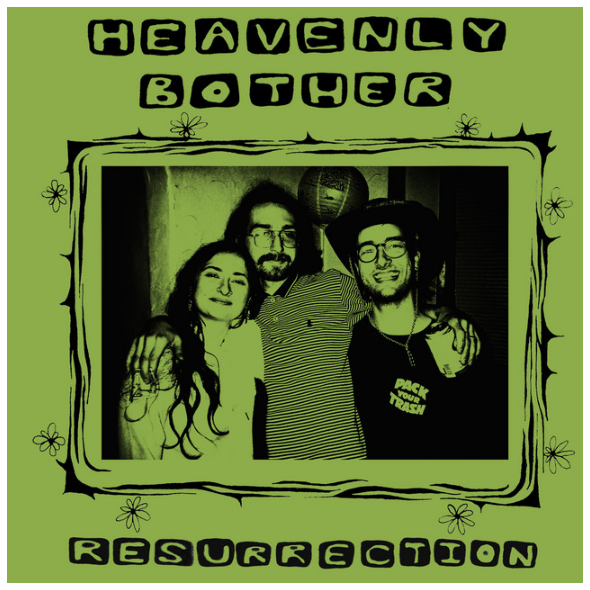

In [190]:
im = Image.open(requests.get(url, stream=True).raw)
ax = plt.axes([0,0,2,2])
plt.axis("off")
my_return=imshow(im)

In [509]:
p=sp.current_user_playlists(limit=10)['items']

In [510]:
url=p[1]['images'][0]['url']

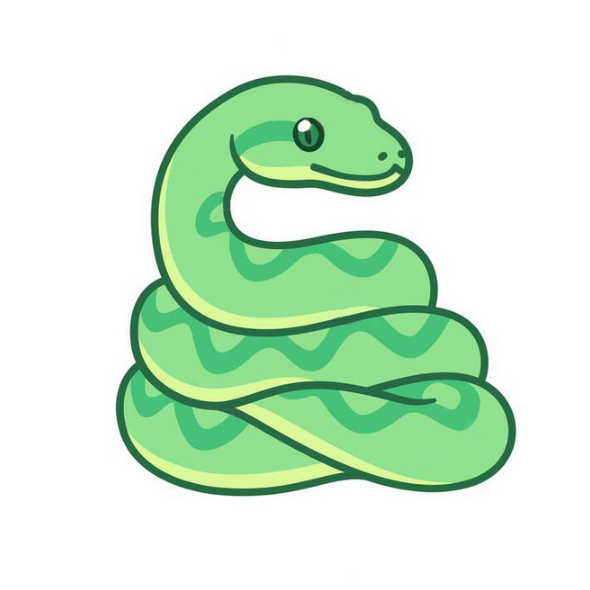

In [898]:
im = Image.open(requests.get(url, stream=True).raw)
ax = plt.axes([0,0,2,2])
plt.axis("off")
imshow(im)

In [513]:
for i in p:
    print(i['name'],i['id'])

Starred 7pNM4ZUXGEvi9jLXGtUUrJ
python 0EOEXvfF15axne6khnXGz9
music i think about often while looking at the void 7rIlDopIVphIXJsyi7z9eX
Mwc 3.5 5I97sAGL4jPp8erjqk69n8
ciao ciao bambina 1nuMWxwCtyrADtmFgLgDpL
（ ´-` ）.｡oO 0J7RAuC991U0svV5dreRfe
in love 6cdAyyyTyszjvWSM1ovlA5
pair of chairs 6bkjLkWpAYpurzrniAWcsX
open window 5FtdzEhu6wgihYpwXwb5ma
battery 3yHoSCA1NB8yG8eimmQXpD


In [155]:
for i in sp.user_playlists(123954053)['items']:
    print(i['name'])

cowfin's best playlist
l’appel du vide
pair of chairs
in the afternoon
overcast
scowl
I so liked spring (december)
soft serve
liminal space
under covers
text me when you wake up
hypnic jerk
twiggy works from home
vacuum
tar snake city
cowfin’s better playlist
cowfin's good playlist
⁣🌟 
open window
midnight snack
( <__< )
river bottom
tunnel vision
( * __ * )
bookmark
(๑･̑◡･̑๑)
🌸 field of flowers 🌸
W(`0`)W
（ ´-` ）.｡oO
♪(*^^)o∀*∀o(^^*)♪
☆彡
hide + seek
jeepers
flowers


In [156]:
sp.user('123954053')

{'display_name': 'Megan Cerminaro',
 'external_urls': {'spotify': 'https://open.spotify.com/user/123954053'},
 'followers': {'href': None, 'total': 28},
 'href': 'https://api.spotify.com/v1/users/123954053',
 'id': '123954053',
 'images': [{'height': None,
   'url': 'https://i.scdn.co/image/ab6775700000ee85717ba922bb3e3b57d0c24fcc',
   'width': None}],
 'type': 'user',
 'uri': 'spotify:user:123954053'}

{'collaborative': False,
 'description': '',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/0EOEXvfF15axne6khnXGz9'},
 'followers': {'href': None, 'total': 1},
 'href': 'https://api.spotify.com/v1/playlists/0EOEXvfF15axne6khnXGz9?additional_types=track',
 'id': '0EOEXvfF15axne6khnXGz9',
 'images': [{'height': None,
   'url': 'https://i.scdn.co/image/ab67706c0000bebbf358bd95b4bec9530db89502',
   'width': None}],
 'name': 'python',
 'owner': {'display_name': 'Erick Martinez',
  'external_urls': {'spotify': 'https://open.spotify.com/user/1246585542'},
  'href': 'https://api.spotify.com/v1/users/1246585542',
  'id': '1246585542',
  'type': 'user',
  'uri': 'spotify:user:1246585542'},
 'primary_color': None,
 'public': True,
 'snapshot_id': 'NDAsNmMxNzM1NzdiYTljYTExMDgzZDhkMjdkYmE4MTkxZTk2MDlmOGJiZA==',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/0EOEXvfF15axne6khnXGz9/tracks?offset=0&limit=100&additional_types=track',
  'items': [{'added_at': '2021-03-07T05:

In [ ]:
whats going in the csv
    needs to be able to filter on:
        release
        artist
        genre
        popularity
        country of origin
        labels
        etc

the program goal?
    import from spotify csv
    import from discogs csv
    combine the data 
    filter the data
    export to spinitron csv format
    

    
class sift
class sifted
class playlist
class combined
class addDiscogsInfo
class port




so i need to start making csvs to pull into python using the csv module which reads by line

port can take a playlist object and a filename
    if playlist is empty it will fill it with data in filename
    if playlist has entries it will create a file with filename and playlist data
    port(playlist, filename) -> modifies playlist in-place
    
addDiscogsInfo -> modifies playlist in-place
sift will modify the playlist in-place    
    sift(playlist, [bools]) -> modifies playlist in-place
sifted will return a sifted version of playlist
    sifted(playlist, [bools]) -> returns new playlist
combined will combine two playlists
    combined(playlist_a, playlist_b) -> returns new playlist
playlist(name, description='')
track()

(maybe include a track object? probably, since it's just like the cards)


In [228]:
sp.playlist_items('7pNM4ZUXGEvi9jLXGtUUrJ')['items'][0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [226]:
sp.playlist_items('7pNM4ZUXGEvi9jLXGtUUrJ')['items'][0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [516]:
results = sp.playlist_items('0EOEXvfF15axne6khnXGz9')
tracks = results['items']
while results['next']:
    results = sp.next(results)
    tracks.extend(results['items'])

In [517]:
len(tracks)

15

In [943]:
# SPOTIFY

import csv
with open('sp.csv', 'w', newline='') as csvfile:
    spwriter = csv.writer(csvfile)
    spwriter.writerow(['name','album', 'artist', 'duration_ms', 'explicit', 'popularity', 'release', 'image', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'])
    for track in tracks:
        ID=track['track']['id']
        name = track['track']['name']
        album = track['track']['album']['name']
        artist = track['track']['artists'][0]['name']
        duration_ms = track['track']['duration_ms']
        explicit = track['track']['explicit']
        popularity = track['track']['popularity']
        release_date = track['track']['album']['release_date']
        image = track['track']['album']['images'][0]['url']
        danceability = sp.audio_features(ID)[0]['danceability']
        energy = sp.audio_features(ID)[0]['energy']
        key = sp.audio_features(ID)[0]['key']
        loudness = sp.audio_features(ID)[0]['loudness']
        mode = sp.audio_features(ID)[0]['mode']
        speechiness = sp.audio_features(ID)[0]['speechiness']
        acousticness = sp.audio_features(ID)[0]['acousticness']
        instrumentalness = sp.audio_features(ID)[0]['instrumentalness']
        liveness = sp.audio_features(ID)[0]['liveness']
        valence = sp.audio_features(ID)[0]['valence']
        tempo = sp.audio_features(ID)[0]['tempo'] 
        
        spwriter.writerow([name, album, artist, duration_ms, explicit, popularity, release_date, image, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo])
        
with open('spmeta.csv', 'w+', newline='') as csvfile:
    spwriter = csv.writer(csvfile)
    spwriter.writerow(['name','description','length','image'])
    row = [sp.playlist('0EOEXvfF15axne6khnXGz9')['name'], 
           sp.playlist('0EOEXvfF15axne6khnXGz9')['description'], 
           len(sp.playlist('0EOEXvfF15axne6khnXGz9')['tracks']['items']), 
           sp.playlist('0EOEXvfF15axne6khnXGz9')['images'][0]['url']]
    spwriter.writerow(row)

In [931]:
sp.playlist('0EOEXvfF15axne6khnXGz9')['name']

'python'

In [941]:
sp.audio_features(ID)[0]['danceability']

0.616

In [945]:

sp.audio_features(ID)[0]

{'danceability': 0.561,
 'energy': 0.325,
 'key': 6,
 'loudness': -8.373,
 'mode': 1,
 'speechiness': 0.0299,
 'acousticness': 0.423,
 'instrumentalness': 0.000693,
 'liveness': 0.118,
 'valence': 0.266,
 'tempo': 126.587,
 'type': 'audio_features',
 'id': '4hJThmCLVi1g4iykhL5yhS',
 'uri': 'spotify:track:4hJThmCLVi1g4iykhL5yhS',
 'track_href': 'https://api.spotify.com/v1/tracks/4hJThmCLVi1g4iykhL5yhS',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4hJThmCLVi1g4iykhL5yhS',
 'duration_ms': 152147,
 'time_signature': 4}

In [924]:
row = [sp.playlist('0EOEXvfF15axne6khnXGz9')['name'], 
           sp.playlist('0EOEXvfF15axne6khnXGz9')['description'], 
           len(sp.playlist('0EOEXvfF15axne6khnXGz9')['tracks']['items']), 
           sp.playlist('0EOEXvfF15axne6khnXGz9')['images'][0]['url']]

In [523]:
r.keys()

dict_keys(['id', 'status', 'year', 'resource_url', 'uri', 'artists', 'artists_sort', 'labels', 'series', 'companies', 'formats', 'data_quality', 'community', 'format_quantity', 'date_added', 'date_changed', 'num_for_sale', 'lowest_price', 'master_id', 'master_url', 'title', 'country', 'released', 'notes', 'released_formatted', 'identifiers', 'videos', 'genres', 'styles', 'tracklist', 'extraartists', 'images', 'thumb', 'estimated_weight'])

In [522]:
r = requests.get('https://api.discogs.com/releases/' + '204021').json()

In [525]:
g = ''
for genre in r['genres']:
    g += ' ' + genre
genres = g[1:]
genres

'Electronic Hip Hop Rock'

In [526]:
results = d.search('bamboo grove CZ-5000 Sounds & Sequences satoshi & makoto', type='release')
results[0].country

'Netherlands'

In [812]:
#DISCOGS

import csv
import time
with open('ds.csv', 'w', newline='') as csvfile:
    spwriter = csv.writer(csvfile)
    spwriter.writerow(['name','album', 'artist', 'label', 'country', 'genres', 'styles'])
    for track in tracks:
        name=album=artist=label=country=genres=styles=''
        time.sleep(1)
        name = track['track']['name']
        album = track['track']['album']['name']
        artist = track['track']['artists'][0]['name']
        
        try:
            result = d.search(name + ' ' + album + ' ' + artist, type='release')[0]
        except Exception as e: 
            try:
                result = d.search(name + ' ' + artist, type='release')[0]
            except Exception as e:
#                 print(name,artist,e)
                spwriter.writerow([name, album, artist, label, country, genres, styles])
                continue
        
#         #accounting for if we got the wrong match (as in songs vs songs and instrumentals by adrianne lenker)
#         if album.lower() != result.title.split(' - ')[-1].lower():
            
#             for rel in d.search(name + ' ' + album + ' ' + artist, type='release'):
#                 print(rel.title,result.title.split(' - ')[-1].lower())
#                 print('---',album.lower(),rel.title.split(' - ')[-1].lower(),album.lower()==rel.title.split(' - ')[-1].lower())
#                 if album.lower() == rel.title.split(' - ')[-1].lower():
#                     result = rel
#         else:
#             continue
        
        label = result.labels[0].name
        country = result.country
        g = ''
        for genre in result.genres:
            g += ' ' + genre
        try:
            s = ''
            for style in result.styles:
                s += ' ' + style
        except:
            s += ' '
                
        genres = g[1:]
        styles = s[1:]



#         r = requests.get('https://api.discogs.com/releases/' + str(result.id)).json()
#         while r == {'message': 'You are making requests too quickly.'}:
#             time.sleep(20)
#             print('slept for', name, artist)
#             r = requests.get('https://api.discogs.com/releases/' + str(result.id)).json()
#         catno = r['labels'][0]['catno']

        spwriter.writerow([name, album, artist, label, country, genres, styles])
        

In [554]:
tracks[8]['track']['name']

'Sky, Ocean, and Weapons (空と海と兵器)'

In [805]:
name = tracks[-3]['track']['name']
album = tracks[-3]['track']['album']['name']
artist = tracks[-3]['track']['artists'][0]['name']

In [806]:
name + ' ' + artist

'Love Hurts Grandaddy'

In [807]:
results = d.search(name + ' ' + artist, type='release')
results[0]

<Release 10104107 'Various - Resistance Radio: The Man In The High Castle Album'>

In [808]:
name + ' ' + album + ' ' + artist

'Love Hurts Resistance Radio: The Man in the High Castle Album Grandaddy'

In [799]:
results = d.search(name + ' ' + album + ' ' + artist, type='release')
results[0]

<Release 10104107 'Various - Resistance Radio: The Man In The High Castle Album'>

In [800]:
results[0].genres

['Rock', 'Pop', 'Stage & Screen']

In [786]:
results[0].labels

[<Label 1866 'Columbia'>, <Label 963358 '30th Century Records'>]

In [787]:
results[0].genres

['Rock', 'Pop', 'Stage & Screen']

In [716]:
name = 'Sweetness'
album = 'Sweetness'
artist = 'Tough Boy'

result = d.search(name + ' ' + album + ' ' + artist, type='release')[0]

In [735]:
print(result.title)
album

The Fashion Focus


'The Fashion Focus'

In [718]:
results = d.search(name + ' ' + album + ' ' + artist, type='release')
results

In [719]:
for i in results:
    print(i)

<Release 1994413 'Various - 100 Hits 90s Pop'>
<Release 7586189 'Various - 100 Essential Tracks - 90s'>
<Release 13471379 'Various - Ibiza 2014 Volume 2'>


In [633]:
'Resistance Radio: The Man in the High Castle Album' == 'Resistance Radio: The Man In The High Castle Album'

False

In [666]:
rel.title

'Starflyer 59 - The Fashion Focus'

In [699]:
result.title

'Starflyer 59 - The Fashion Focus'

In [675]:
w=d.search(name + ' ' + album + ' ' + artist, type='release')[1].title

In [684]:
l=d.search(name + ' ' + album + ' ' + artist, type='release')[0]

In [687]:
l

<Release 1118680 'Starflyer 59 - The Fashion Focus'>

In [725]:
result.title

'Various - 100 Hits 90s Pop'

In [713]:
print(result)
print(d.search(name + ' ' + album + ' ' + artist, type='release')[0])
result == d.search(name + ' ' + album + ' ' + artist, type='release')[0]

<Release 1118680 'The Fashion Focus'>
<Release 1118680 'Starflyer 59 - The Fashion Focus'>


True

In [722]:
result = d.search(name + ' ' + artist, type='release')[0]

In [723]:
result

<Release 1994413 'Various - 100 Hits 90s Pop'>

In [724]:
d.search(name + ' ' + album + ' ' + artist, type='release')[0]

<Release 1994413 'Various - 100 Hits 90s Pop'>

In [736]:
results[0].title

'Starflyer 59 - The Fashion Focus'

In [737]:
result.title

'The Fashion Focus'

In [738]:
result==results[0]

True

In [753]:
q=results[0]

In [754]:
q.title

'The Fashion Focus'

In [747]:
result.title

'Starflyer 59 - The Fashion Focus'

In [861]:
result = d.search(name + ' ' + album + ' ' + artist, type='release')[0]

In [862]:
result.title

'Starflyer 59 - The Fashion Focus'

In [863]:
result.labels

[<Label 46138 'Burnt Toast Vinyl'>,
 <Label 1816 'Velvet Blue Music'>,
 <Label 1816 'Velvet Blue Music'>]

In [864]:
result.title

'The Fashion Focus'

In [880]:
name

'Fell In Love At 22'

In [810]:
for genre,style in zip(results[0].genres, results[0].styles):
                print(genre)
                g += ' ' + genre
                s += ' ' + style

Rock


In [811]:
results[0].genres

['Rock', 'Pop', 'Stage & Screen']

In [830]:
ID='3rfyQw7pAnXgSKmli0reRS'
print(sp.track(ID)['name'])
sp.audio_features(ID)

Fantasy Movie


[{'danceability': 0.616,
  'energy': 0.732,
  'key': 0,
  'loudness': -6.572,
  'mode': 1,
  'speechiness': 0.028,
  'acousticness': 0.0292,
  'instrumentalness': 0.00116,
  'liveness': 0.129,
  'valence': 0.397,
  'tempo': 115.036,
  'type': 'audio_features',
  'id': '3rfyQw7pAnXgSKmli0reRS',
  'uri': 'spotify:track:3rfyQw7pAnXgSKmli0reRS',
  'track_href': 'https://api.spotify.com/v1/tracks/3rfyQw7pAnXgSKmli0reRS',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3rfyQw7pAnXgSKmli0reRS',
  'duration_ms': 232861,
  'time_signature': 4}]

In [831]:
ID='2INJp01Du6nOpCLbZpf2PU'
print(sp.track(ID)['name'])
sp.audio_features(ID)

Hawt Heart


[{'danceability': 0.867,
  'energy': 0.637,
  'key': 7,
  'loudness': -6.992,
  'mode': 0,
  'speechiness': 0.0512,
  'acousticness': 0.306,
  'instrumentalness': 0.0537,
  'liveness': 0.069,
  'valence': 0.84,
  'tempo': 105.918,
  'type': 'audio_features',
  'id': '2INJp01Du6nOpCLbZpf2PU',
  'uri': 'spotify:track:2INJp01Du6nOpCLbZpf2PU',
  'track_href': 'https://api.spotify.com/v1/tracks/2INJp01Du6nOpCLbZpf2PU',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2INJp01Du6nOpCLbZpf2PU',
  'duration_ms': 120069,
  'time_signature': 4}]

In [834]:
ID='5epHWCC8wgXBgO1MJEHjUZ'
print(sp.track(ID)['name'])
sp.audio_features(ID)

She's a Ridin' Man, a Hitchin' Man


[{'danceability': 0.665,
  'energy': 0.219,
  'key': 7,
  'loudness': -15.426,
  'mode': 1,
  'speechiness': 0.044,
  'acousticness': 0.916,
  'instrumentalness': 0.217,
  'liveness': 0.121,
  'valence': 0.435,
  'tempo': 117.306,
  'type': 'audio_features',
  'id': '5epHWCC8wgXBgO1MJEHjUZ',
  'uri': 'spotify:track:5epHWCC8wgXBgO1MJEHjUZ',
  'track_href': 'https://api.spotify.com/v1/tracks/5epHWCC8wgXBgO1MJEHjUZ',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5epHWCC8wgXBgO1MJEHjUZ',
  'duration_ms': 315000,
  'time_signature': 4}]

In [833]:
ID='4k45d1ZRroHLRYg2lUofre'
print(sp.track(ID)['name'])
sp.audio_features(ID)

touch


[{'danceability': 0.743,
  'energy': 0.124,
  'key': 9,
  'loudness': -19.339,
  'mode': 1,
  'speechiness': 0.0381,
  'acousticness': 0.67,
  'instrumentalness': 0.6,
  'liveness': 0.112,
  'valence': 0.291,
  'tempo': 90.048,
  'type': 'audio_features',
  'id': '4k45d1ZRroHLRYg2lUofre',
  'uri': 'spotify:track:4k45d1ZRroHLRYg2lUofre',
  'track_href': 'https://api.spotify.com/v1/tracks/4k45d1ZRroHLRYg2lUofre',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4k45d1ZRroHLRYg2lUofre',
  'duration_ms': 164667,
  'time_signature': 4}]

In [871]:
sp.track(ID)

{'album': {'album_type': 'single',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6tkYzCJd3Btidn8WEGA44c'},
    'href': 'https://api.spotify.com/v1/artists/6tkYzCJd3Btidn8WEGA44c',
    'id': '6tkYzCJd3Btidn8WEGA44c',
    'name': 'Leti',
    'type': 'artist',
    'uri': 'spotify:artist:6tkYzCJd3Btidn8WEGA44c'}],
  'available_markets': ['AD',
   'AE',
   'AG',
   'AL',
   'AM',
   'AR',
   'AT',
   'AU',
   'AZ',
   'BA',
   'BB',
   'BD',
   'BE',
   'BF',
   'BG',
   'BH',
   'BI',
   'BN',
   'BO',
   'BR',
   'BS',
   'BT',
   'BW',
   'BY',
   'BZ',
   'CA',
   'CH',
   'CL',
   'CM',
   'CO',
   'CR',
   'CV',
   'CW',
   'CY',
   'CZ',
   'DE',
   'DK',
   'DM',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'FI',
   'FJ',
   'FM',
   'FR',
   'GA',
   'GB',
   'GD',
   'GE',
   'GH',
   'GM',
   'GN',
   'GQ',
   'GR',
   'GT',
   'GW',
   'GY',
   'HK',
   'HN',
   'HR',
   'HT',
   'HU',
   'ID',
   'IE',
   'IL',
   'IN',
   'IS',
   'IT

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

scope = "user-read-playback-state user-read-currently-playing user-library-read user-top-read user-read-recently-played playlist-read-private playlist-read-collaborative"
redirect_uri= 'https://example.com/callback/'

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id='d3c4d26f750f45daa2434a1585745291',
                                               client_secret='8912e43e7ebe4b1a84097e3997eb50ec',
                                               scope=scope,
                                               redirect_uri=redirect_uri))

# results = sp.current_user_saved_tracks()
# for idx, item in enumerate(results['items']):
#     track = item['track']
#     print(idx, track['artists'][0]['name'], " – ", track['name'])

In [3]:
r = sp.categories(offset = 0,limit = 50)
for i in r['categories']['items']:
    print(i['name'])

Top Lists
Pop
EQUAL
Mood
Decades
Hip-Hop
In the car
Gaming
Wellness
Workout
Chill
Focus
Sleep
Party
Indie
Metal
Rock
Dance/Electronic
Cooking & Dining
Jazz
R&B
Instrumental
Romance
Soul
Kids & Family
Classical
Latin
Caribbean
Blues
Funk
Punk
Country
Folk & Acoustic
Desi
Arab
Afro
Travel
K-Pop
Ambient
Happy Holidays


[{'href': 'https://api.spotify.com/v1/browse/categories/toplists',
  'icons': [{'height': 275,
    'url': 'https://t.scdn.co/media/derived/toplists_11160599e6a04ac5d6f2757f5511778f_0_0_275_275.jpg',
    'width': 275}],
  'id': 'toplists',
  'name': 'Top Lists'},
 {'href': 'https://api.spotify.com/v1/browse/categories/hiphop',
  'icons': [{'height': 274,
    'url': 'https://t.scdn.co/media/original/hip-274_0a661854d61e29eace5fe63f73495e68_274x274.jpg',
    'width': 274}],
  'id': 'hiphop',
  'name': 'Hip Hop'},
 {'href': 'https://api.spotify.com/v1/browse/categories/pop',
  'icons': [{'height': 274,
    'url': 'https://t.scdn.co/media/derived/pop-274x274_447148649685019f5e2a03a39e78ba52_0_0_274_274.jpg',
    'width': 274}],
  'id': 'pop',
  'name': 'Pop'},
 {'href': 'https://api.spotify.com/v1/browse/categories/country',
  'icons': [{'height': None,
    'url': 'https://t.scdn.co/images/a2e0ebe2ebed4566ba1d8236b869241f.jpeg',
    'width': None}],
  'id': 'country',
  'name': 'Country'},


In [4]:
r = sp.category_playlists('decades',limit = 50)
for i in r['playlists']['items']:
    if i['name'][:3] == 'All':
        print(i['name'],i['id'])

All Out 80s 37i9dQZF1DX4UtSsGT1Sbe
All Out 2000s 37i9dQZF1DX4o1oenSJRJd
All Out 2010s 37i9dQZF1DX5Ejj0EkURtP
All Out 70s 37i9dQZF1DWTJ7xPn4vNaz
All Out 90s 37i9dQZF1DXbTxeAdrVG2l
All Out 60s 37i9dQZF1DXaKIA8E7WcJj
All Out 50s 37i9dQZF1DWSV3Tk4GO2fq


In [1]:
r = sp.category_playlists('toplists',limit = 50)
for i in r['playlists']['items']:
    print(i['name'],i['id'])

NameError: name 'sp' is not defined

In [277]:
import time
import pandas as pd

df = pd.DataFrame()

# track features
album_name = []
album_image_url = []
album_release_date = []
artist = []
duration_ms = []
explicit = []
track_id = []
name = [] 
popularity = []
preview_url = []

# audio features
danceability = []
energy = []
key = []
loudness = []
mode = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []
valence = []
tempo = []
time_signature = []

# artist features
artist_followers = []
artist_genres = []
artist_popularity = []

# All Out 50s 37i9dQZF1DWSV3Tk4GO2fq
# All Out 60s 37i9dQZF1DXaKIA8E7WcJj
# All Out 70s 37i9dQZF1DWTJ7xPn4vNaz
# All Out 80s 37i9dQZF1DX4UtSsGT1Sbe
# All Out 90s 37i9dQZF1DXbTxeAdrVG2l
# All Out 00s 37i9dQZF1DX4o1oenSJRJd
# All Out 10s 37i9dQZF1DX5Ejj0EkURtP

playlist_ids = ['37i9dQZF1DWSV3Tk4GO2fq',
                '37i9dQZF1DXaKIA8E7WcJj',
                '37i9dQZF1DWTJ7xPn4vNaz',
                '37i9dQZF1DX4UtSsGT1Sbe',
                '37i9dQZF1DXbTxeAdrVG2l',
                '37i9dQZF1DX4o1oenSJRJd',
                '37i9dQZF1DX5Ejj0EkURtP']

for playlist_id in playlist_ids:
    r = sp.playlist(playlist_id)['tracks']
    for i in r['items']:
        album_name.append(i['track']['album']['name'])
        album_image_url.append(i['track']['album']['images'][0]['url'])
        album_release_date.append(i['track']['album']['release_date'])
        artist.append(i['track']['artists'][0]['name'])
        duration_ms.append(i['track']['duration_ms'])
        explicit.append(i['track']['explicit'])
        track_id.append(i['track']['id'])
        name.append(i['track']['name'])
        popularity.append(i['track']['popularity'])
        preview_url.append(i['track']['preview_url'])

        try:
            u = sp.audio_features(i['track']['id'])
        except Exception as e:
            print(name[-1],e)
            time.sleep(5)
            u = sp.audio_features(i['track']['id'])

        danceability.append(u[0]['danceability'])
        energy.append(u[0]['energy'])
        key.append(u[0]['key'])
        loudness.append(u[0]['loudness'])
        mode.append(u[0]['mode'])
        speechiness.append(u[0]['speechiness'])
        acousticness.append(u[0]['acousticness'])
        instrumentalness.append(u[0]['instrumentalness'])
        liveness.append(u[0]['liveness'])
        valence.append(u[0]['valence'])
        tempo.append(u[0]['tempo'])
        time_signature.append(u[0]['time_signature'])

        try:
            v=sp.artist(i['track']['artists'][0]['id'])
        except Exception as e:
            print(name[-1],e)
            time.sleep(5)
            v=sp.artist(i['track']['artists'][0]['id'])

        artist_followers.append(v['followers']['total'])
        artist_genres.append(v['genres'])
        artist_popularity.append(v['popularity'])


    t=sp.next(r)
    for i in t['items']:
        album_name.append(i['track']['album']['name'])
        album_image_url.append(i['track']['album']['images'][0]['url'])
        album_release_date.append(i['track']['album']['release_date'])
        artist.append(i['track']['artists'][0]['name'])
        duration_ms.append(i['track']['duration_ms'])
        explicit.append(i['track']['explicit'])
        track_id.append(i['track']['id'])
        name.append(i['track']['name'])
        popularity.append(i['track']['popularity'])
        preview_url.append(i['track']['preview_url'])

        try:
            u = sp.audio_features(i['track']['id'])
        except Exception as e:
            print(name[-1],e)
            time.sleep(5)
            u = sp.audio_features(i['track']['id'])

        danceability.append(u[0]['danceability'])
        energy.append(u[0]['energy'])
        key.append(u[0]['key'])
        loudness.append(u[0]['loudness'])
        mode.append(u[0]['mode'])
        speechiness.append(u[0]['speechiness'])
        acousticness.append(u[0]['acousticness'])
        instrumentalness.append(u[0]['instrumentalness'])
        liveness.append(u[0]['liveness'])
        valence.append(u[0]['valence'])
        tempo.append(u[0]['tempo'])
        time_signature.append(u[0]['time_signature'])

        try:
            v=sp.artist(i['track']['artists'][0]['id'])
        except Exception as e:
            print(name[-1],e)
            time.sleep(5)
            v=sp.artist(i['track']['artists'][0]['id'])

        artist_followers.append(v['followers']['total'])
        artist_genres.append(v['genres'])
        artist_popularity.append(v['popularity'])

    
df['name'] = name
df['artist'] = artist
df['album_name'] = album_name
df['album_image_url'] = album_image_url
df['album_release_date'] = album_release_date
df['duration_ms'] = duration_ms
df['explicit'] = explicit 
df['popularity'] = popularity 
df['preview_url'] = preview_url
df['danceability'] = danceability
df['energy'] = energy
df['key'] = key
df['loudness'] = loudness 
df['mode'] = mode
df['speechiness'] = speechiness
df['acousticness'] = acousticness
df['instrumentalness'] = instrumentalness
df['liveness'] = liveness 
df['valence'] = valence 
df['tempo'] = tempo
df['time_signature'] = time_signature
df['artist_followers'] = artist_followers
df['artist_genres'] = artist_genres
df['artist_popularity'] = artist_popularity
df['track_id'] = track_id 



Try Sleeping With a Broken Heart HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)


In [281]:
df

,name,artist,album_name,album_image_url,album_release_date,duration_ms,explicit,popularity,preview_url,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_followers,artist_genres,artist_popularity,track_id
0,Don't Be Cruel,Elvis Presley,Elvis' Golden Records,https://i.scdn.co/image/ab67616d0000b27320ee3e...,1958-03-21,122893,False,59,https://p.scdn.co/mp3-preview/7a3c50df53ab91b8...,0.697,...,0.85600,0.000034,0.0907,0.844,84.802,4,5832760,"[rock-and-roll, rockabilly]",78,01u6AEzGbGbQyYVdxajxqk
1,I've Got You Under My Skin - Remastered 1998,Frank Sinatra,Songs For Swingin' Lovers! (Remastered),https://i.scdn.co/image/ab67616d0000b273b9ea1c...,1956-03,223760,False,66,https://p.scdn.co/mp3-preview/225d71ffaecd12bc...,0.585,...,0.45200,0.000009,0.1070,0.591,127.150,4,5043932,"[adult standards, easy listening, lounge]",77,3aEJMh1cXKEjgh52claxQp
2,Smoke Gets In Your Eyes,The Platters,The Best Of The Platters,https://i.scdn.co/image/ab67616d0000b2738f596f...,1995-01-01,157293,False,0,None,0.290,...,0.94400,0.000079,0.6170,0.224,114.278,4,536560,"[adult standards, brill building pop, doo-wop,...",61,307XEC1IUwUs9ojlEFwH7f
3,"What'd I Say, Pt. 1 & 2",Ray Charles,What'd I Say,https://i.scdn.co/image/ab67616d0000b2731990f6...,1959,307053,False,62,https://p.scdn.co/mp3-preview/f1ba866a9dae60ca...,0.540,...,0.80800,0.000000,0.1620,0.794,88.385,4,1773820,"[adult standards, classic soul, jazz blues, pi...",67,5yQ9iMZXGcr5rlO4hoLsP4
4,Dream A Little Dream Of Me,Ella Fitzgerald,Ella & Friends,https://i.scdn.co/image/ab67616d0000b273bf2c87...,1996-06-04,185066,False,0,None,0.455,...,0.91800,0.000000,0.1730,0.404,76.118,4,2041525,"[adult standards, jazz blues, swing, vocal jazz]",69,3vFVS2WYHDG4KkWCNecvpn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,Love Lies (with Normani),Khalid,Love Lies (with Normani),https://i.scdn.co/image/ab67616d0000b273dd7eaf...,2018-02-14,201707,False,74,https://p.scdn.co/mp3-preview/d53d5678b946219b...,0.708,...,0.09560,0.000000,0.1340,0.338,143.955,4,14332906,"[pop, pop r&b]",88,45Egmo7icyopuzJN0oMEdk
1046,I Knew You Were Trouble,Taylor Swift,I Knew You Were Trouble.,https://i.scdn.co/image/ab67616d0000b2731f75d0...,2012-01-01,219720,False,0,None,0.602,...,0.00572,0.000005,0.0330,0.664,154.076,4,43440296,"[pop, post-teen pop]",93,21K6jcmZPktm7MftqfLfLg
1047,no tears left to cry,Ariana Grande,Sweetener,https://i.scdn.co/image/ab67616d0000b273c3af0c...,2018-08-17,205920,False,77,https://p.scdn.co/mp3-preview/df24b2c3008bd622...,0.699,...,0.04000,0.000003,0.2940,0.354,121.993,4,69224319,"[dance pop, pop, post-teen pop]",92,2qT1uLXPVPzGgFOx4jtEuo
1048,We Found Love,Rihanna,Talk That Talk,https://i.scdn.co/image/ab67616d0000b2731c5eac...,2011-11-19,215226,False,73,https://p.scdn.co/mp3-preview/bfcd28f63ab9462d...,0.735,...,0.02500,0.001380,0.1080,0.600,127.985,4,44907443,"[barbadian pop, dance pop, pop, post-teen pop,...",89,0U10zFw4GlBacOy9VDGfGL


In [282]:
df.to_csv('spotify_decades.csv')